# Preamble

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

In [10]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : True,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()],
          "text.latex.preamble" : r"\usepackage{amsmath}"}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

## Functions to calculate the baseline

In [11]:
def d_alpha_EW(t):
    """
    returns the effective baseline in the RA direction for a east-west
    interferometer baseline

    Parameters
    ----------
    t : np.array [0, 2*np.pi)
        the array of the observed time where t = np.pi/2 when the star
        crosses the zenith [radian]
    """
    return np.sin(t)
    

def d_delta_EW(dec, t):
    """
    returns the effective baseline in the DEC direction for a east-west
    interferometer baseline

    Parameters
    ----------
    dec : float [-pi/2, pi/2]
        the DEC of the star observed in [radian]
    t : np.array [0, 2*pi)
        the array of the observed time where t = pi/2 when the star
        crosses the zenith [radian]
    """
    return -np.sin(dec)*np.cos(t)
    

def d_EW(dec, t):
    """
    returns the total effective baseline and scan angle for a east-west
    interferometer baseline

    Parameters
    ----------
    dec : float [-pi/2, pi/2]
        the DEC of the star observed in [radian]
    t : np.array [0, 2*pi)
        the array of the observed time where t = pi/2 when the star
        crosses the zenith [radian]
    """
    d_delta = d_delta_EW(dec, t)
    d_eff = np.sqrt(d_alpha_EW(t)**2 + d_delta**2)
    return d_eff, np.arcsin(d_delta/d_eff)


def d_alpha_NS(lat, t):
    """
    returns the effective baseline in the RA direction for a north-south
    interferometer baseline

    Parameters
    ----------
    lat : float [-pi/2, pi/2]
        the lattitude of the interferometer in [radian]
    t : np.array [0, 2*np.pi)
        the array of the observed time where t = np.pi/2 when the star
        crosses the zenith [radian]
    """
    return np.cos(t)*np.sin(lat)


def d_delta_NS(lat, dec, t):
    """
    returns the effective baseline in the DEC direction for a north-south
    interferometer baseline

    Parameters
    ----------
    lat : float [-pi/2, pi/2]
        the lattitude of the interferometer in [radian]
    dec : float [-pi/2, pi/2]
        the DEC of the star observed in [radian]
    t : np.array [0, 2*pi)
        the array of the observed time where t = pi/2 when the star
        crosses the zenith [radian]
    """
    return np.sin(dec)*np.sin(t)*np.sin(lat) + np.cos(lat)*np.cos(dec)


def d_NS(lat, dec, t):
    """
    returns the total effective baseline and scan angle for a north-south
    interferometer baseline

    Parameters
    ----------
    lat : float [-pi/2, pi/2]
        the lattitude of the interferometer in [radian]
    dec : float [-pi/2, pi/2]
        the DEC of the star observed in [radian]
    t : np.array [0, 2*pi)
        the array of the observed time where t = pi/2 when the star
        crosses the zenith [radian]
    """
    d_alpha = d_alpha_NS(lat, t)
    d_eff = np.sqrt(d_alpha**2 + d_delta_NS(lat, dec, t)**2)   
    return d_eff, np.arccos(d_alpha/d_eff)

### input parameters

In [12]:
# input observation info
dec = 15/180*np.pi
lat = 30*np.pi/180

In [13]:
t = np.linspace(0,np.pi,100)

dd_EW, ang_EW = d_EW(dec,t)
dd_NS, ang_NS = d_NS(lat, dec,t)

Text(0.5, 1.0, 'star at $\\delta = 15^\\circ$, N$-$S baseline, lat $30^\\circ$')

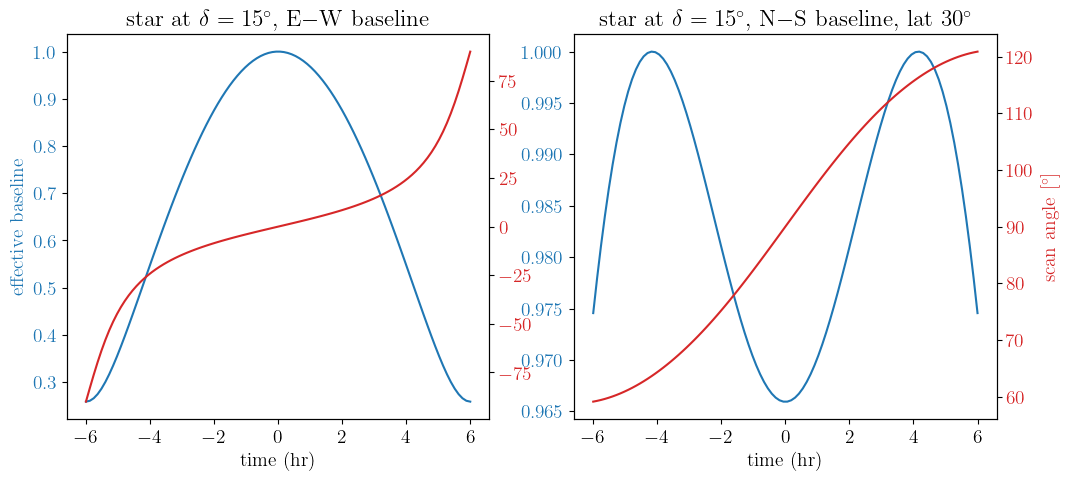

In [14]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize = (12,5))
#plt.subplot(121)
color = 'tab:blue'
ax1.set_xlabel('time (hr)')
ax1.set_ylabel('effective baseline', color=color)
ax1.plot(t/np.pi*12-6, dd_EW, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
#ax2.set_ylabel('scan angle', color=color)  # we already handled the x-label with ax1
ax2.plot(t/np.pi*12-6, ang_EW/np.pi*180, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title(f'star at $\delta = {int(dec/np.pi*180)}^\circ$, E$-$W baseline')


color = 'tab:blue'
ax3.set_xlabel('time (hr)')
#ax3.set_ylabel('effective baseline', color=color)
ax3.plot(t/np.pi*12-6, dd_NS, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax4.set_ylabel('scan angle [$^\circ$]', color=color)  # we already handled the x-label with ax1
ax4.plot(t/np.pi*12-6, ang_NS/np.pi*180, color=color)
ax4.tick_params(axis='y', labelcolor=color)

ax3.set_title(f'star at $\delta = {int(dec/np.pi*180)}^\circ$, N$-$S baseline, lat ${int(lat/np.pi*180)}^\circ$')

In [15]:
t_ar = np.linspace(0,np.pi/2,6)
t_ar_f = np.linspace(0,np.pi/2,100)

dd_EW, ang_EW = d_EW(dec,t_ar)
dd_NS, ang_NS = d_NS(lat,dec,t_ar)

dd_EW_f, ang_EW_f = d_EW(dec,t_ar_f)
dd_NS_f, ang_NS_f = d_NS(lat,dec,t_ar_f)

In [16]:
x_EW = dd_EW*np.cos(ang_EW)
y_EW = dd_EW*np.sin(ang_EW)

x_NS = dd_NS*np.cos(ang_NS)
y_NS = dd_NS*np.sin(ang_NS)

x_EW_f = dd_EW_f*np.cos(ang_EW_f)
y_EW_f = dd_EW_f*np.sin(ang_EW_f)

x_NS_f = dd_NS_f*np.cos(ang_NS_f)
y_NS_f = dd_NS_f*np.sin(ang_NS_f)

Text(0, 0.5, '$v~[\\Theta_\\text{ph}^{-1}]$')

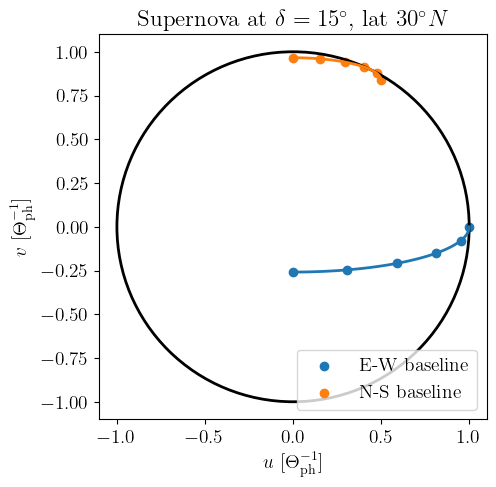

In [17]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(x_EW, y_EW, color = 'tab:blue', label = 'E-W baseline')
ax.plot(x_EW_f, y_EW_f, color = 'tab:blue', lw = 2)
ax.scatter(x_NS, y_NS, color = 'tab:orange', label = 'N-S baseline')
ax.plot(x_NS_f, y_NS_f, color = 'tab:orange', lw = 2)
circle1 = plt.Circle((0, 0), 1, color='k', fill = False, lw = 2)
ax.add_patch(circle1)
#fig.set_aspect(1)
ax.set_title(f'Supernova at $\delta = {int(dec/np.pi*180)}^\circ$, lat ${int(lat/np.pi*180)}^\circ N$')
ax.legend(loc = 'lower right')
#ax.set_xlabel(r'image $x~[\theta_\text{ph}]$')
ax.set_xlabel(r'$u~[\Theta_\text{ph}^{-1}]$')
#ax.set_ylabel(r'image $y~[\theta_\text{ph}]$')
ax.set_ylabel(r'$v~[\Theta_\text{ph}^{-1}]$')
#plt.savefig('baseline.pdf', bbox_inches = 'tight')